# Numerical Homework 2

Code as follow for problems that require it

#### Original work created on 28/10/2022

#### Author: Terry Cox  


In [1]:
import numpy as np

### Problem 3

In [314]:
def get_D(A):
    D = A*1
    for i, a in enumerate(A):
        for j, x in enumerate(a.T):
            if i != j:
                D[i,j] = 0
    #print('D:', D)
    return D

def get_E(A):
    E = -1*A
    for i, a in enumerate(A):
        for j, x in enumerate(a.T):
            if i <= j:
                E[i,j] = 0
    #print('E:', E)
    return E
         
    
def get_F(A):
    F = -1*A
    for i, a in enumerate(A):
        for j, x in enumerate(a.T):
            if j <= i:
                F[i,j] = 0
    #print('F:', F)
    return F

def get_spetral_radius(A):
    eigs = []
    for lam in np.linalg.eigvals(A):
        try:
            l = (lam.real**2 + lam.imag**2)**(1/2)
        except:
            l = lam
        eigs.append(l)
        
    return np.max(np.abs(eigs))

def get_B_j(A):
    return np.linalg.inv(get_D(A))*(get_E(A)+get_F(A))

def get_B_gs(A):
    return np.linalg.inv(get_D(A)-get_E(A))*get_F(A)

In [315]:
A_1 = np.matrix([[-3, 3, -6], [-4, 7, -8], [5,7,-9]])
A_2 = np.matrix([[7,6,9], [4,5,-48], [-7,3,8]])

In [316]:
B_j_1 = get_B_j(A_1)
B_j_2 = get_B_j(A_2)
B_gs_1 = get_B_gs(A_1)
B_gs_2 = get_B_gs(A_2)

In [317]:
get_spetral_radius(B_j_1), get_spetral_radius(B_gs_1)

(0.8133091054692768, 1.1111111111111105)

In [318]:
get_spetral_radius(B_j_2), get_spetral_radius(B_gs_2)

(2.401779691593403, 2.6832815729997477)

Only Jacobi Method for $A_1$ will converge because $\rho(B_j) < 1$, but Jacobi Method for $A_1$ and Gauss-Seidl for $A_1$ and $A_2$ all have a $B$ matrix with a spectral radius greater than 1 

### Problem 4

##### a)
Solution = $[5,2]^T$ 

JOR Solution = $[5.00000001, 2.00000003]^T$

In [118]:
#a
def JOR_iteration(A,b,x_0, omega=1):
    return x_0 + omega*np.linalg.inv(get_D(A))*(b - A*x_0)

def get_error(A,b,x):
    return np.linalg.norm(b-A*x, 2)

def JOR(A,b,x_0,omega=1,tol=1e-6):
    results = {'x_k' : [x_0], 'error' : [get_error(A,b,x_0)], 'iterations' : 0}
    while(results['error'][-1] > tol):
        results['x_k'].append(JOR_iteration(A,b,results['x_k'][-1],omega))
        results['error'].append(get_error(A,b,results['x_k'][-1]))
        results['iterations'] += 1
    return results['x_k'][-1], results

In [140]:
A = np.matrix([[100,-1],[-1,4]])
b = np.matrix([[498,3]]).T

x_0 = np.matrix([[10, 10]]).T
omega = 0.5

x, results = JOR(A,b,x_0,omega)
x

matrix([[5.00000001],
        [2.00000003]])

In [141]:
A*x, b

(matrix([[498.00000068],
         [  3.00000013]]),
 matrix([[498],
         [  3]]))

##### b)

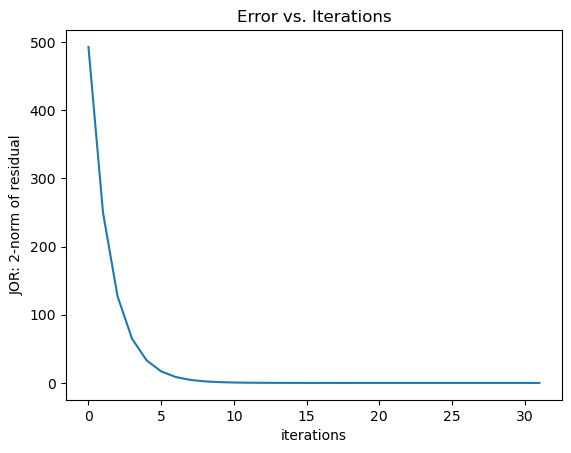

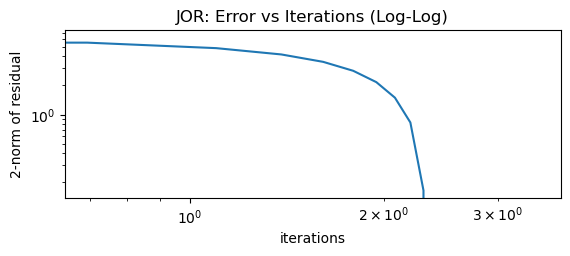

In [147]:
import matplotlib.pyplot as plt
plt.plot(list(range(results['iterations']+1)), results['error'])
plt.xlabel('iterations')
plt.ylabel('JOR: 2-norm of residual')
plt.title('Error vs. Iterations')
plt.show()

from matplotlib import pyplot


pyplot.subplot(2,1,1)
pyplot.plot(np.log(np.array(list(range(results['iterations']+1)))+1), np.log((results['error'])))
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.title('JOR: Error vs Iterations (Log-Log)')
pyplot.xlabel('iterations')
pyplot.ylabel('2-norm of residual')
pyplot.show()

##### c)
Number of iterations for JOR to converge:
31

In [148]:
# Number of iterations for JOR to converge:
results['iterations']

31

##### d)
Number of iterations for JM to converge:
7

In [150]:
# Number of iterations for JM to converge:
x_jm, results_jm = JOR(A,b,x_0,omega=1)
results_jm['iterations']

7

### Problem 5

##### a)
$\phi(y) = \frac{1}{2}y^TAy-y^Tb$

In [174]:
def phi(y, A,b):
    return 0.5*y.T*A*y-y.T*b

##### b)
Solution = $[5,2]^T$

JOR Solution = $[5., 2.00000003]^T$

Iterations: 17

In [160]:
def gradient_method_iteration(A,b,x_0, tol=1e-6, alpha=None):
    r_k = b-A*x_0
    if alpha is None:
        alpha = np.dot(r_k.T, r_k)/np.dot(r_k.T, A*r_k)
    return x_0 + alpha[0,0]*r_k

def gradient_method(A,b,x_0, tol=1e-6, alpha=None):
    results = {'x_k' : [x_0], 'error' : [get_error(A,b,x_0)], 'iterations' : 0}
    while(results['error'][-1] > tol):
        results['x_k'].append(gradient_method_iteration(A,b,results['x_k'][-1]))
        results['error'].append(get_error(A,b,results['x_k'][-1]))
        results['iterations'] += 1
    return results['x_k'][-1], results

In [221]:
x_gm, results_gm = gradient_method(A,b,x_0)
print('Solution:')
x_gm

Solution:


matrix([[5.        ],
        [2.00000003]])

In [222]:
print('Iterations:')
results_gm['iterations']

Iterations:


17

##### c)

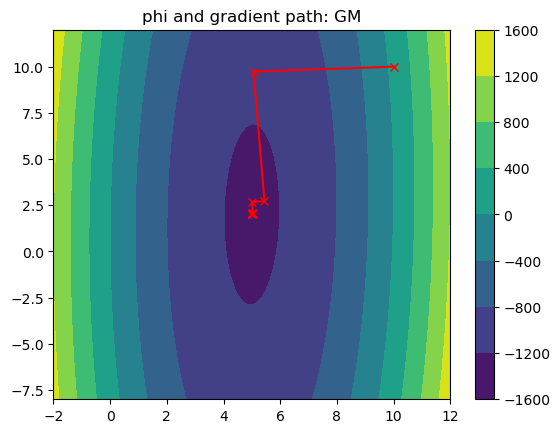

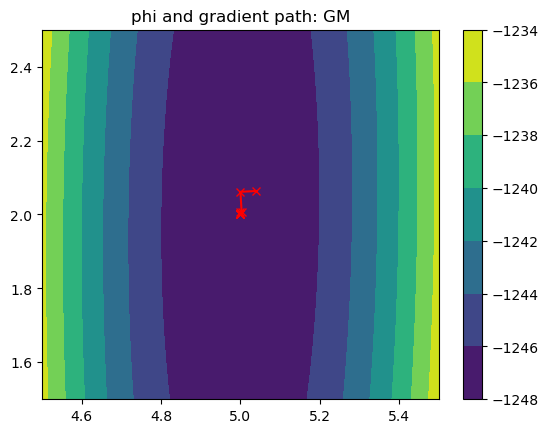

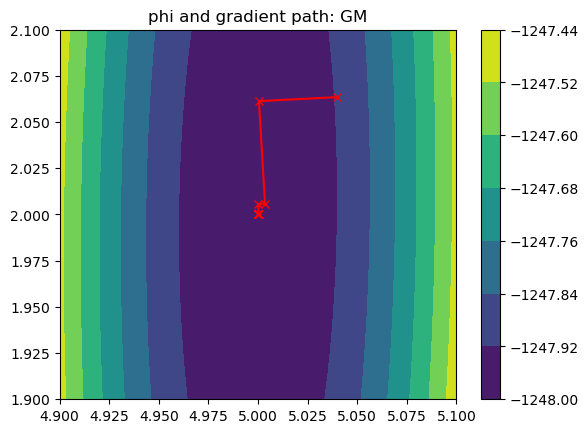

In [320]:
def build_Z(X,Y, A,b):
    Z = np.zeros(X.shape)
    for i, row in enumerate(X):
        for j, x in enumerate(row):
            Z[i,j] = phi(np.matrix([[x,Y[i,j]]]).T, A,b)
    return Z


def build_contour_plot(xlist,ylist, A,b, results, title='phi and gradiant path'):
    X, Y = np.meshgrid(xlist, ylist)


    Z = build_Z(X,Y, A,b)

    #path_x = [float(x[0,0]) for x in results['x_k'] if x[0,0] < np.max(xlist) and x[0,0] > np.min(xlist)]
    #path_y = [float(x[1,0]) for x in results['x_k'] if x[1,0] < np.max(ylist) and x[1,0] > np.min(ylist)]
    path_x = []
    path_y = []
    for x in results['x_k']:
        if x[0,0] < np.max(xlist) and x[0,0] > np.min(xlist) and x[1,0] < np.max(ylist) and x[1,0] > np.min(ylist):
            path_x.append(float(x[0,0]))
            path_y.append(float(x[1,0]))

    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    ax.plot(path_x,path_y, 'r-x')
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(title)
    #ax.set_xlabel('x (cm)')
    #ax.set_ylabel('y (cm)')
    plt.show()
    
title='phi and gradient path: GM'
xlist = np.linspace(-2, 12, 100)
ylist = np.linspace(-8, 12, 100)
build_contour_plot(xlist,ylist,A,b,results_gm, title)

xlist = np.linspace(4.5, 5.5, 100)
ylist = np.linspace(1.5, 2.5, 100)
build_contour_plot(xlist,ylist,A,b,results_gm, title)

xlist = np.linspace(4.9, 5.1, 100)
ylist = np.linspace(1.9, 2.1, 100)
build_contour_plot(xlist,ylist,A,b,results_gm, title)

##### d)
###### b)

In [322]:
def conj_gradient_method(A,b,x_0, tol=1e-6, alpha=None):
    results = {'x_k' : [x_0], 'error' : [get_error(A,b,x_0)], 'iterations' : 0}
    p = b-A*x_0
    print(p.shape, b.shape, A.shape, x_0.shape)
    while(results['error'][-1] > tol):
        r = b-A*results['x_k'][-1]
        alpha = np.dot(p.T, r)/np.dot(p.T, A*p)
        r_1 = r - alpha[0,0]*A*p
        beta_k = np.dot((A*p).T, r_1)/np.dot((A*p).T, p)
        #print(beta_k)
        
        x_1 = results['x_k'][-1] + alpha[0,0]*p
        p = r_1 - beta_k[0,0]*p
        
        results['x_k'].append(x_1)
        results['error'].append(get_error(A,b,x_1))
        results['iterations'] += 1
        #p = get_next_dir_p(A,b,x_0,p)
        #print(results['error'][-1])
    return results['x_k'][-1], results

In [323]:
x_cgm, results_cgm = conj_gradient_method(A,b,x_0)
print('Solution:')
x_cgm

(2, 1) (2, 1) (2, 2) (2, 1)
Solution:


matrix([[5.],
        [2.]])

In [309]:
print('Iterations:')
results_cgm['iterations']

Iterations:


2

###### c)

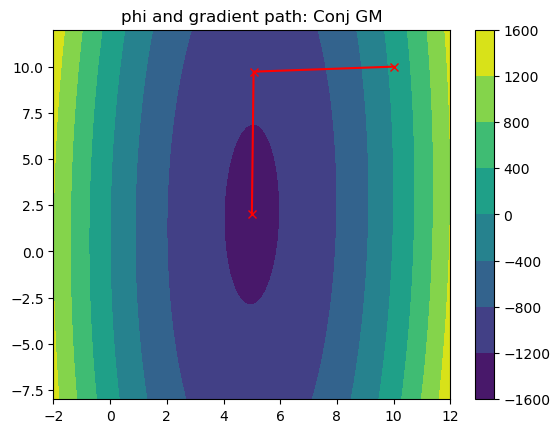

In [321]:
title='phi and gradient path: Conj GM'
xlist = np.linspace(-2, 12, 100)
ylist = np.linspace(-8, 12, 100)
build_contour_plot(xlist,ylist,A,b,results_cgm, title)

# xlist = np.linspace(4.5, 5.5, 100)
# ylist = np.linspace(1.5, 2.5, 100)
# build_contour_plot(xlist,ylist,A,b,results_gm, title)

# xlist = np.linspace(4.9, 5.1, 100)
# ylist = np.linspace(1.9, 2.1, 100)
# build_contour_plot(xlist,ylist,A,b,results_gm, title)

##### e)

The gradient method took 17 iterations and the conjugate gradient method only to 2 iterations.  This makes sense as the gradient method is just taking the steepest downward directions (the gradient...suprise) and the conjugate gradient takes the most optimal direction to the minimum of $\phi$